In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#highest salary and YearsofExp
data.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

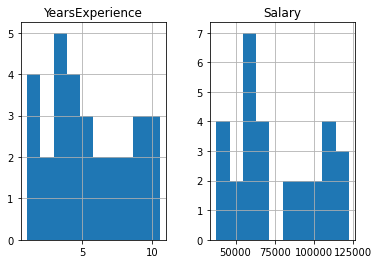

In [6]:
# use hist plot to check data
data.hist( )

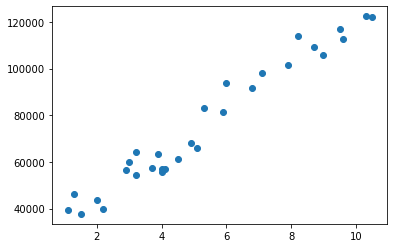

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data.YearsExperience,data.Salary)

# Seperate Input and output

In [8]:
X = data.iloc[:,:-1]
X #here we get df

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [9]:
# if we want array
X = data.iloc[:,:-1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
#salary
y=data.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

### Calling the object of LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()
model.fit(X,y)#training

LinearRegression()

### Prediction

In [18]:
model.predict([[10.9]])

array([128796.78950253])

In [19]:
model.predict([[0]])# what would be the salary for fresher

array([25792.20019867])

In [20]:
model.predict([[40]])

array([403790.69305687])

In [21]:
m = model.coef_
c = model.intercept_

In [22]:
m,c

(array([9449.96232146]), 25792.20019866871)

In [23]:
#y=mx+c #prediction equation is now ready after training/fit
m*40 + c

array([403790.69305687])

In [25]:
print('Accuracy is:',model.score(X,y)*100)

Accuracy is: 95.69566641435085


In [26]:
data.shape

(30, 2)

- Till now we were using total record for training, and explicite records for testing
- Now we r going to use some strategies, to split data into training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
#strategy we have to use here is: 80% for training & 20% for testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [31]:
len(X_train)

24

In [32]:
len(X_test)

6

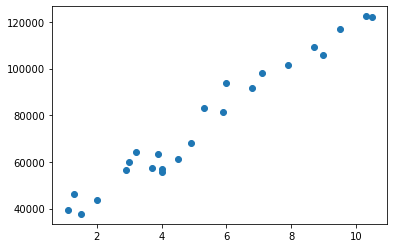

In [36]:
plt.scatter(X_train,y_train)

In [33]:
#training with new samples
lr  = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
#check training data score
lr.score(X_train,y_train)*100

96.29754397598093

In [37]:
#testing/prediction
X_test

array([[5.1],
       [9.6],
       [8.2],
       [3.2],
       [4.1],
       [2.2]])

In [39]:
y_pred = lr.predict(X_test)

In [40]:
y_pred

array([ 74745.43320546, 116132.3275121 , 103256.40483892,  57270.96672043,
        65548.34558176,  48073.87909673])

### Visualization of data

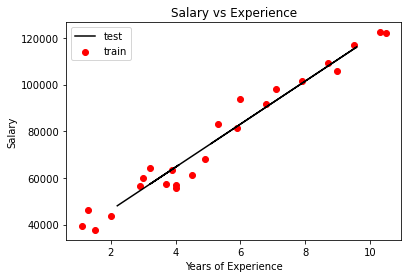

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train,y_train,color='red',label='train')
plt.plot(X_test,y_pred,color='k',label='test')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

In [43]:
df = pd.read_csv('gas.csv')

In [44]:
df.head(2)

,Consumption of petrol (millions of gallons)
0,1 9.00 3571 1976 0.5250 541
1,2 9.00 4092 1250 0.5720 524


In [46]:
df['Consumption of petrol (millions of gallons)'][:3]

0     1   9.00  3571   1976  0.5250  541
1     2   9.00  4092   1250  0.5720  524
2     3   9.00  3865   1586  0.5800  561
Name: Consumption of petrol (millions of gallons), dtype: object

In [48]:
d = df['Consumption of petrol (millions of gallons)'].str.split(expand=True)

In [51]:
d

,0,1,2,3,4,5
0,1,9.00,3571,1976,0.5250,541
1,2,9.00,4092,1250,0.5720,524
2,3,9.00,3865,1586,0.5800,561
3,4,7.50,4870,2351,0.5290,414
4,5,8.00,4399,431,0.5440,410
5,6,10.00,5342,1333,0.5710,457
6,7,8.00,5319,11868,0.4510,344
7,8,8.00,5126,2138,0.5530,467
8,9,8.00,4447,8577,0.5290,464
9,10,7.00,4512,8507,0.5520,498


In [59]:
d.columns = ['Index','Petrol_tax','Average_income',
                        'Paved_Highways','Proportion_population',
                        'Consumption_of_petrol']

In [60]:
d

,Index,Petrol_tax,Average_income,Paved_Highways,Proportion_population,Consumption_of_petrol
0,1,9.00,3571,1976,0.5250,541
1,2,9.00,4092,1250,0.5720,524
2,3,9.00,3865,1586,0.5800,561
3,4,7.50,4870,2351,0.5290,414
4,5,8.00,4399,431,0.5440,410
5,6,10.00,5342,1333,0.5710,457
6,7,8.00,5319,11868,0.4510,344
7,8,8.00,5126,2138,0.5530,467
8,9,8.00,4447,8577,0.5290,464
9,10,7.00,4512,8507,0.5520,498


In [61]:
import seaborn as sns

In [65]:
type(d)

pandas.core.frame.DataFrame

In [67]:
d.drop(columns=['Index'],inplace=True)

In [70]:
d.dtypes

Petrol_tax               object
Average_income           object
Paved_Highways           object
Proportion_population    object
Consumption_of_petrol    object
dtype: object

In [72]:
d = d.astype('float')

In [73]:
d.dtypes

Petrol_tax               float64
Average_income           float64
Paved_Highways           float64
Proportion_population    float64
Consumption_of_petrol    float64
dtype: object

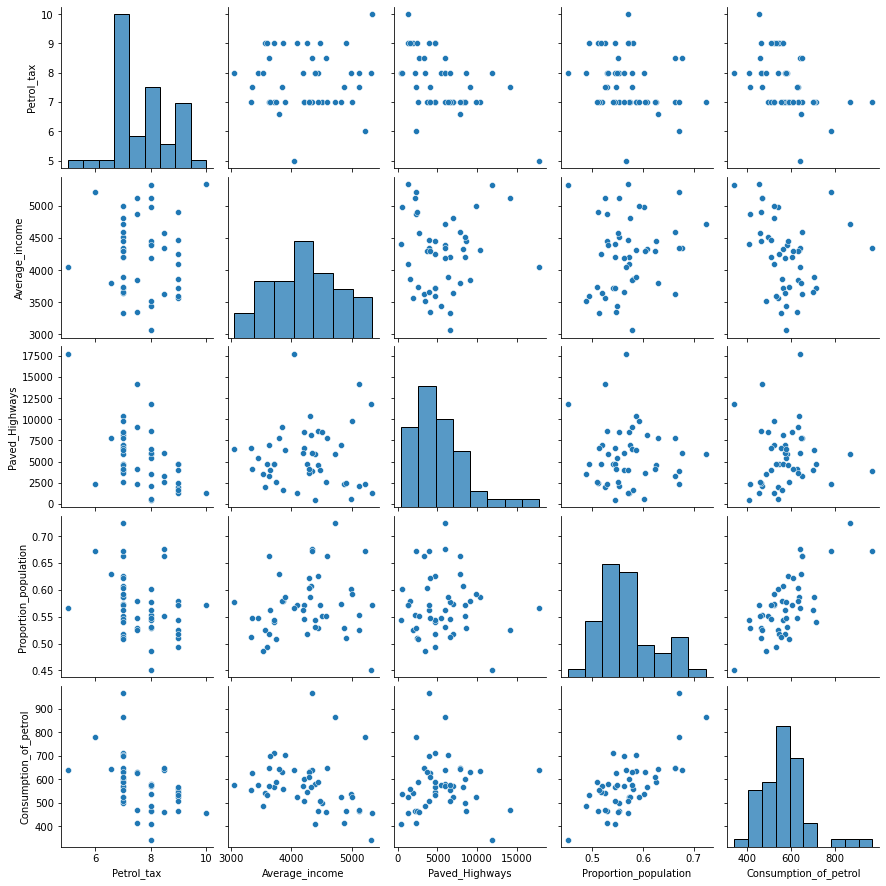

In [74]:
sns.pairplot(d)